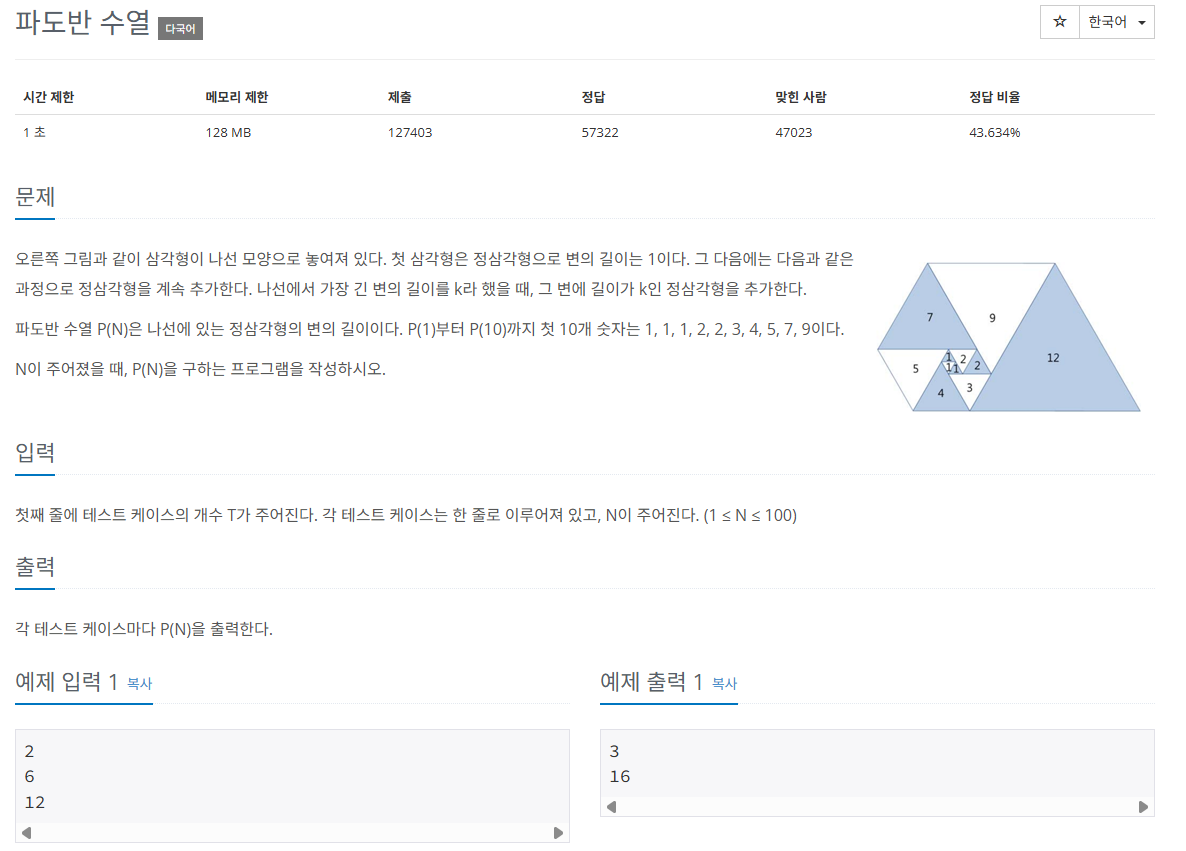

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-13 205610.png")
img

In [ ]:
import sys

input = sys.stdin.readline

T=int(input())

dp=[-1,1,1,1,2,2,3,4,5,7,9]

for i in range(11,101):
    dp.append(dp[i-5]+dp[i-1])

for _ in range(T):
    print(dp[int(input())])

3
16


네, '제출완료' 확인했습니다. 그리고 이번에도 DP 문제의 점화식을 정확히 찾아내어 '사전 계산' 방식으로 완벽하게 구현하셨습니다. DP에 대한 이해도가 정말 높으시네요.

먼저 코드 리뷰를 진행하고, 이어서 질문해주신 "리스트를 미리 할당하고 앞부분만 초기화하는 방법"에 대해 상세히 알려드리겠습니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 5.0 / 5.0 점**

      * **평가:** **완벽한 정답입니다.** 문제의 숨겨진 점화식(`dp[i] = dp[i-5] + dp[i-1]`)을 정확히 찾아냈으며, 여러 테스트 케이스에 대비한 사전 계산 방식까지 적용하여 매우 효율적으로 문제를 해결했습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 로직과 기능적으로 완전히 동일합니다. 다만, 질문하신 내용에 맞춰 DP 테이블을 **먼저 생성하고, 초기값을 슬라이싱으로 할당**하는, 조금 더 Pythonic한 스타일을 보여주는 코드입니다.

-----

### \#\# Gemini 추천 코드 (질문에 대한 답변 포함)

```python
import sys

input = sys.stdin.readline

# 1. DP 테이블을 최대값(100)까지의 크기로 미리 생성합니다.
dp = [0] * 101

# 2. 초기 베이스 케이스 값들을 '슬라이싱'을 이용해 한 번에 할당합니다.
#    dp[1]부터 dp[10]까지의 값을 지정합니다.
dp[1:11] = [1, 1, 1, 2, 2, 3, 4, 5, 7, 9]

# 3. 점화식을 이용해 나머지 DP 테이블을 채웁니다.
for i in range(11, 101):
    dp[i] = dp[i-5] + dp[i-1]

# 4. 각 테스트 케이스에 대해 미리 계산된 값을 O(1)로 찾아 출력합니다.
T = int(input())
for _ in range(T):
    n = int(input())
    print(dp[n])
```

-----

### \#\# 1. 알고리즘 및 파이썬 문법 측면

  * **알고리즘:** **최적입니다.** O(N\_max + T)의 시간 복잡도로, 더 이상 개선할 부분이 없습니다.
  * **Pythonic Style:** `append`를 반복하는 대신, 리스트를 미리 할당하고 슬라이싱으로 초기화하는 것이 조금 더 Pythonic하고 가독성이 좋습니다.

-----

### \#\# 2. 질문에 대한 상세 답변

> **"dp를 총 101개로 assignment한 다음에 앞부분 10개만 저런식으로 할당하고싶으면 코드를 어떻게 짜야돼?"**

네, 아주 좋은 질문입니다. 두 가지 방법이 있습니다.

#### **방법 1: 직접 인덱스로 하나씩 할당하기 (가장 기본적)**

가장 직관적인 방법입니다.

```python
dp = [0] * 101
dp[1] = 1
dp[2] = 1
dp[3] = 1
# ...
dp[10] = 9
```

#### **방법 2: 리스트 슬라이싱(Slicing) 사용하기 (가장 Pythonic)**

**추천하는 방법입니다.** 리스트의 특정 구간을 다른 리스트의 내용으로 한 번에 바꿔치기할 수 있습니다.

```python
dp = [0] * 101

# dp 리스트의 1번 인덱스부터 10번 인덱스까지의 공간을
# 오른쪽 리스트의 값들로 채워넣습니다.
initial_values = [1, 1, 1, 2, 2, 3, 4, 5, 7, 9]
dp[1:11] = initial_values 
```

이 슬라이싱을 이용한 할당 방식은 코드를 매우 간결하고 읽기 쉽게 만들어주므로, 꼭 기억해두시면 좋습니다.

-----

### \#\# 3. 또 다른 측면: 점화식의 발견 (파도반 수열)

이번 문제에서 가장 어려웠을 부분은 바로 `dp[i] = dp[i-5] + dp[i-1]` 라는 점화식을 찾아내는 과정이었을 겁니다.

이 수열은 \*\*파도반 수열(Padovan sequence)\*\*이라는 이름이 붙어있는 유명한 수열입니다.

  * `P(n) = P(n-2) + P(n-3)` 이 기본 형태이지만, 이 문제에서는 변형된 형태(`P(n) = P(n-1) + P(n-5)`)가 나타납니다.

이런 규칙은 보통 `n=1, 2, 3, ...` 일 때의 답을 손으로 직접 몇 개 구해보고, 그 숫자들 사이의 관계를 관찰함으로써 발견할 수 있습니다.

  * `dp[6] = 3`인데, `dp[1]+dp[5]` = `1+2` = `3`
  * `dp[7] = 4`인데, `dp[2]+dp[6]` = `1+3` = `4`
  * `dp[8] = 5`인데, `dp[3]+dp[7]` = `1+4` = `5`

이처럼 작은 예시들을 통해 규칙성을 찾아내고, 그것을 일반적인 점화식으로 만드는 능력이 바로 DP 문제 해결의 핵심 역량입니다. 이 어려운 과정을 훌륭하게 해내셨습니다.